In [1]:
import pandas as pd

In [3]:
wine_data = pd.read_csv('./data/winequality-white.csv',
                       names=['Fixed Acidity',
                              'Volatile Acidity',
                              'Citric Acid',
                              'Residual Sugar',
                              'Chlorides',
                              'Free Sulfur dioxide',
                              'Total Sulfur dioxide',
                              'Density',
                              'pH',
                              'Sulphates',
                              'Alcohol',
                              'Quality'],
                       skiprows=1,
                       sep=r'\s*;\s*', engine='python')
wine_data.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur dioxide,Total Sulfur dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wine_data['Quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [5]:
X = wine_data.drop('Quality', axis=1)
Y = wine_data['Quality']

from sklearn import preprocessing
X = preprocessing.scale(X)

from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [6]:
from sklearn.svm import LinearSVC

clf_svc = LinearSVC(penalty='l1',dual=False, tol=1e-3)
clf_svc.fit(X_train, Y_train)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
          verbose=0)

In [7]:
accuracy = clf_svc.score(x_test,y_test)
accuracy

0.49183673469387756

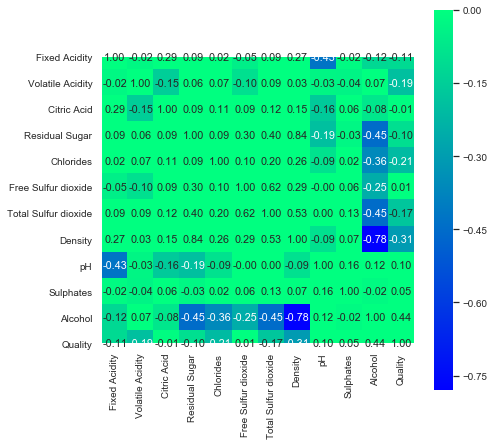

In [11]:
import matplotlib.pyplot as plt
import seaborn as sbn

corrmat = wine_data.corr()
f, ax = plt.subplots(figsize=(7,7))
sbn.set(font_scale=0.9)
sbn.heatmap(corrmat, vmax=.0, square= True, annot=True, fmt='.2f', cmap = 'winter')

!matplotlib inline
plt.show()

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, whiten=True)
X_reduced = pca.fit_transform(X)

In [40]:
pca.explained_variance_

array([3.2229119])

In [41]:
pca.explained_variance_ratio_

array([0.29293217])

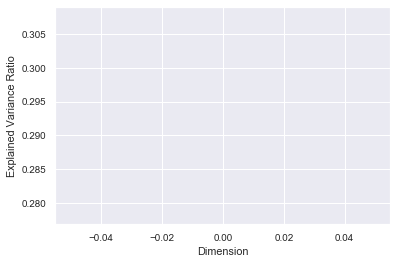

In [42]:
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Dimension')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [43]:
X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
clf_svc_pca = LinearSVC(penalty='l1',dual=False, tol=1e-3)
clf_svc_pca.fit(X_train, Y_train)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
          verbose=0)

In [44]:
accuracy = clf_svc_pca.score(x_test,y_test)
accuracy

0.49183673469387756